<a href="https://colab.research.google.com/github/wrwilliam/My-machine-learning-project/blob/main/FinalProject_v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Final Project Option-1
####Team members: Wei Ruan(NUID:001532991) Lanou Qu(NUID:002792750)
##### Use the image data from following source and create a model to train and test images for following categories of diagnosis:Atelectasis, Cardiomegaly, Consolidation, Edema, Effusion, Emphysema, Fibrosis, Infiltration, Mass, Nodule, Pneumonia, Pneumothorax, Pleural, No Findings
##### Dataset: https://www.kaggle.com/khanfashee/nih224folderwise-data

### Download the dataset

Download the dataset from the file in the google drive.

In [ ]:
!gdown --id "18MHRvcn2VdoJunP8w3LL-JyEF8XyMy7p"

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18MHRvcn2VdoJunP8w3LL-JyEF8XyMy7p
To: /content/diagnosis_photos.zip
100% 3.08G/3.08G [00:25<00:00, 122MB/s]


In [ ]:
! cd /content/
! unzip diagnosis_photos.zip > /dev/null
! pip install -q -U keras-tuner
! pip install -q -U autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 703.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 83.9 MB/s eta 0:00:00


### Libraries imports

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import KFold
import keras_tuner
from kerastuner import HyperModel
from tensorflow import keras
from kerastuner.tuners import RandomSearch

<ipython-input-3-07ef8bdc8a96>:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


### Checking the images

In [ ]:
import glob
import pathlib
import PIL
data_dir = '/content/Nih All d/'
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('Cardiomegaly/*')))
print(image_count) # print the images number in the Cardiomegaly folder

2776


In [ ]:
def checkimage(filename):
  image_count=len(list(data_dir.glob(filename)))
  print("total image in this files:",image_count)
  img=PIL.Image.open(str(list(data_dir.glob(filename))[0])) # show the image
  wid, hgt = img.size
  print("the size of image:",str(wid) + "x" + str(hgt)) # get the size(width and height) of the image

In [ ]:
filename1='Cardiomegaly/*'
checkimage(filename1) #show image and get size of image in Caediomegaly folder

total image in this files: 2776
the size of image: 224x224


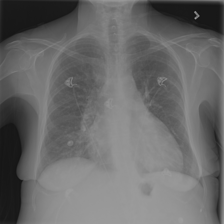

In [ ]:
#show image
PIL.Image.open(str(list(data_dir.glob(filename1))[0]))

### Explore the data

Check the class name of the dataset.

In [ ]:
import os 
import cv2
from PIL import Image 

d = {} # build a dictionary, folder name as key, value is the number of images in the folder

paths = data_dir
for folder in os.listdir(paths):
    print(folder)  # showing each class or folder name
    image_folder =  str(paths) +"/"+ folder
    images = os.listdir(image_folder)
    d[folder] = len(images)

No Finding
Emphysema
Effusion
Infiltration
Cardiomegaly
Fibrosis
Hernia
Pneumothorax
Mass
Pneumonia
Edema
Atelectasis
Consolidation
Pleural
Nodule


Showing the number of images of each class 

In [ ]:
for key in d.keys(): 
    print("Found {} images for {}!" .format(d[key], key)) 
print("================")
print(" the total class:",len(d))

Found 6331 images for Nodule!
Found 5302 images for Pneumothorax!
Found 3385 images for Pleural!
Found 60361 images for No Finding!
Found 11559 images for Atelectasis!
Found 4667 images for Consolidation!
Found 2516 images for Emphysema!
Found 227 images for Hernia!
Found 1686 images for Fibrosis!
Found 13317 images for Effusion!
Found 2303 images for Edema!
Found 1431 images for Pneumonia!
Found 2776 images for Cardiomegaly!
Found 5782 images for Mass!
Found 19894 images for Infiltration!
 the total class: 15


### Split the dataset and data augmentation 

Use only 40% of the dataset to train and test the model 

In [ ]:
import glob
import pathlib
import PIL
import shutil
data_dir = '/content/Nih All d/'
data_dir = pathlib.Path(data_dir)
data_dir1=data_dir
# Count total number of images
image_count = len(list(data_dir.glob('*/*')))
print("Total number of images:", image_count)

# Calculate number of images to keep (40%)
keep_count = int(image_count * 0.4)

# Shuffle and sample the file list
file_list = list(data_dir.glob('*/*'))
np.random.shuffle(file_list)
file_list = file_list[:keep_count]

# Move the selected files to a new directory
new_dir = '/content/Nih 40 d/'
for file_path in file_list:
    class_name = file_path.parent.name
    new_class_dir = pathlib.Path(new_dir) / class_name
    new_class_dir.mkdir(parents=True, exist_ok=True)
    new_file_path = new_class_dir / file_path.name
    shutil.copy2(file_path, new_file_path)

data_dir = new_dir
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*')))
print("Number of images after downsampling:", image_count)

Total number of images: 141537
Number of images after downsampling: 110773


Image preprocessing and data augmentation

In [ ]:
# define some aguments
image_size = (224, 224)
image_shape = (image_size[0], image_size[1], 3)
batch = 32
epochs = 5
max_trials_for_search = 5
no_classes = 15
loss_function = "categorical_crossentropy"
optimizer = 'adam'

# Data augmentation
train_data_gen = ImageDataGenerator(
    rescale=1./255,    # data normalization
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1
)

test_data_gen = ImageDataGenerator(
    rescale=1./255,    # data normalization
    validation_split=0.1
)

# Split/class generation
train_data = train_data_gen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch,
    class_mode='categorical',  
    subset='training'
)

test_data = test_data_gen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch,
    class_mode='categorical',
    subset='validation'
)

print(train_data.class_indices)  # print the class name and its index 
print(test_data.class_indices)

Found 81423 images belonging to 15 classes.
Found 9040 images belonging to 15 classes.
{'Atelectasis': 0, 'Cardiomegaly': 1, 'Consolidation': 2, 'Edema': 3, 'Effusion': 4, 'Emphysema': 5, 'Fibrosis': 6, 'Hernia': 7, 'Infiltration': 8, 'Mass': 9, 'No Finding': 10, 'Nodule': 11, 'Pleural': 12, 'Pneumonia': 13, 'Pneumothorax': 14}
{'Atelectasis': 0, 'Cardiomegaly': 1, 'Consolidation': 2, 'Edema': 3, 'Effusion': 4, 'Emphysema': 5, 'Fibrosis': 6, 'Hernia': 7, 'Infiltration': 8, 'Mass': 9, 'No Finding': 10, 'Nodule': 11, 'Pleural': 12, 'Pneumonia': 13, 'Pneumothorax': 14}


### Building the model

In [ ]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=image_shape))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Conv2D(64, (3,3), activation='relu'))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(15, activation='softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dropout (Dropout)           (None, 186624)            0

### Compile and train the model

In [ ]:
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy', 'mae'])

In [ ]:
history_1 = model_1.fit(train_data,validation_data=test_data,verbose=1,epochs=5)

Epoch 1/5
1593/1593 [==============================] - 649s 400ms/step - loss: 2.0983 - accuracy: 0.4170 - mae: 0.1067 - val_loss: 1.9692 - val_accuracy: 0.4277 - val_mae: 0.1011
Epoch 2/5
1593/1593 [==============================] - 618s 388ms/step - loss: 2.0064 - accuracy: 0.4272 - mae: 0.1043 - val_loss: 1.9704 - val_accuracy: 0.4277 - val_mae: 0.1037
Epoch 3/5
1593/1593 [==============================] - 629s 395ms/step - loss: 1.9871 - accuracy: 0.4272 - mae: 0.1035 - val_loss: 1.9584 - val_accuracy: 0.4277 - val_mae: 0.1029
Epoch 4/5
1593/1593 [==============================] - 623s 391ms/step - loss: 1.9780 - accuracy: 0.4272 - mae: 0.1030 - val_loss: 1.9479 - val_accuracy: 0.4277 - val_mae: 0.1025
Epoch 5/5
1593/1593 [==============================] - 626s 393ms/step - loss: 1.9691 - accuracy: 0.4272 - mae: 0.1025 - val_loss: 1.9401 - val_accuracy: 0.4277 - val_mae: 0.1023


### Evaluate the model and show training/test accuracy and training/test losses

In [ ]:
# showing the curves of acc and val_acc,as well as loss and val_loss
def plot_history(hist):
  plt.plot(hist.history['accuracy'], label='accuracy')
  plt.plot(hist.history['val_accuracy'], label='val_accuracy')
  plt.plot(hist.history['loss'], label='loss')
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  
  loss, acc, mae = model_1.evaluate(test_data)
  print("Accuracy", acc)

177/177 [==============================] - 12s 67ms/step - loss: 1.9401 - accuracy: 0.4277 - mae: 0.1023
Accuracy 0.4277374744415283


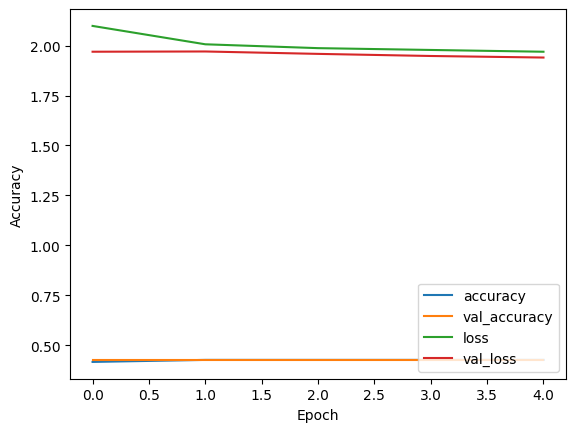

In [ ]:
plot_history(history_1) 

### K-fold Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_predict

Found 50961 images belonging to 15 classes.
Found 5653 images belonging to 15 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                   

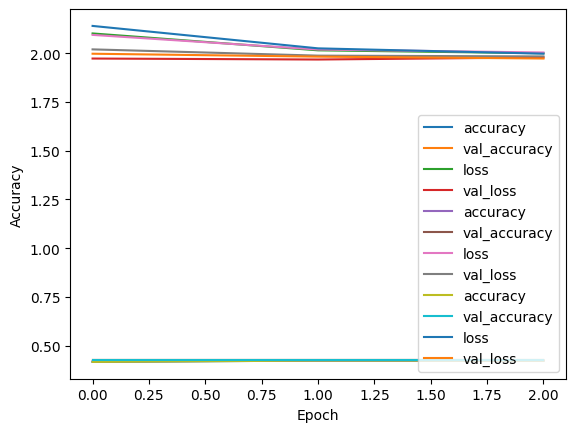

In [ ]:
# Define the K-fold Cross Validator
num_folds=3
kfold = KFold(n_splits=num_folds, shuffle=True)
# K-fold Cross Validation model evaluation
num_folds=3
fin_acc=[]
fold_no = 1 # initial round number
for _ in range(num_folds):
  # split/class generation
  # data augmentation
  train_data_gen = ImageDataGenerator(
      rescale=1./255,    # data normalization
      zoom_range=0.2,
      horizontal_flip="True",
      vertical_flip="True",
      width_shift_range=0.2,
      height_shift_range=0.2,
      validation_split=0.1
  )

  test_data_gen = ImageDataGenerator(
      rescale=1./255,    # data normalization
      validation_split=0.1
  )

  # split/class generation
  train_data = train_data_gen.flow_from_directory(
      data_dir,
      target_size=image_size,
      batch_size=batch,
      shuffle=True,
      class_mode='categorical',  
      subset='training'
  )

  
  test_data = test_data_gen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch,
    class_mode='categorical',
    subset='validation')
  # building model 
  model_1 = models.Sequential()
  model_1.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=image_shape))
  model_1.add(layers.MaxPooling2D((2,2)))
  model_1.add(layers.Conv2D(64, (3,3), activation='relu'))
  model_1.add(layers.MaxPooling2D((2,2)))
  model_1.add(layers.Flatten())
  model_1.add(layers.Dropout(0.5))
  model_1.add(layers.Dense(64, activation='relu'))
  model_1.add(layers.Dropout(0.5))
  model_1.add(layers.Dense(15, activation='softmax'))

  # model compile and fit
  model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy', 'mae'])
  history = model_1.fit(train_data,validation_data=test_data,verbose=1,epochs=3)
   
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...') # print the current round number 
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

  fold_no=fold_no+1  # round number increase 1


### Hyperparameter Tuning

Use a model builder function to define the image classification model. The model builder function returns a compiled model and uses hyperparameters to hypertune the model.




In [ ]:
class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = keras.Sequential()
        model.add(
            layers.Conv2D(
                filters=hp.Choice(
                    'num_filters_1',
                    values=[32, 64],
                    default=32,
                ),
                kernel_size=3,
                activation='relu',
                input_shape=self.input_shape
            )
        )
        model.add(layers.MaxPooling2D(pool_size=2))
        model.add(layers.Conv2D(64, (3,3), activation='relu'))
        model.add(layers.MaxPooling2D(pool_size=2))
        model.add(layers.Flatten())
        model.add(
            layers.Dropout(
                rate=hp.Float(
                    'dropout_1',
                    min_value=0.0,
                    max_value=0.5,
                    default=0.25,
                    step=0.25
                )
            )
        )
        model.add(
            layers.Dense(
                units=hp.Int(
                    'units',
                    min_value=32,
                    max_value=128,
                    step=32,
                    default=128
                ),
                activation ='relu'
            )
        )
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(self.num_classes, activation='softmax'))
        
        model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy', 'mae'])
      
        return model

hypermodel = CNNHyperModel(input_shape=image_shape, num_classes=15)

####Random Search

Instantiate the tuner and perform hypertuning

In [ ]:
random_search_tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    seed=1234,
    max_trials=max_trials_for_search,
    executions_per_trial=1,
    directory='random_search',
    project_name='disease_recognition'
)

In [ ]:
random_search_tuner.search_space_summary()

Search space summary
Default search space size: 3
num_filters_1 (Choice)
{'default': 32, 'conditions': [], 'values': [32, 64], 'ordered': True}
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.25, 'sampling': 'linear'}
units (Int)
{'default': 128, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}


Use stop-early can help prevent the overfitting 

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
random_search_tuner.search(train_data, epochs = 5, validation_data=test_data, callbacks=[stop_early])

Trial 5 Complete [00h 52m 55s]
val_accuracy: 0.4277374744415283

Best val_accuracy So Far: 0.4277374744415283
Total elapsed time: 04h 28m 29s


In [ ]:
random_search_best_model = random_search_tuner.get_best_models(num_models=1)[0]

random_search_best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dropout (Dropout)           (None, 186624)            0

In [ ]:
history_2 = random_search_best_model.fit(train_data,validation_data=test_data,verbose=1,epochs=5)

Epoch 1/5
1593/1593 [==============================] - 624s 389ms/step - loss: 2.0652 - accuracy: 0.4241 - mae: 0.1054 - val_loss: 1.9648 - val_accuracy: 0.4277 - val_mae: 0.1023
Epoch 2/5
1593/1593 [==============================] - 620s 389ms/step - loss: 2.0043 - accuracy: 0.4272 - mae: 0.1039 - val_loss: 1.9624 - val_accuracy: 0.4277 - val_mae: 0.1037
Epoch 3/5
1593/1593 [==============================] - 620s 389ms/step - loss: 1.9895 - accuracy: 0.4272 - mae: 0.1034 - val_loss: 1.9593 - val_accuracy: 0.4277 - val_mae: 0.1035
Epoch 4/5
1593/1593 [==============================] - 623s 391ms/step - loss: 1.9817 - accuracy: 0.4271 - mae: 0.1030 - val_loss: 1.9570 - val_accuracy: 0.4277 - val_mae: 0.1035
Epoch 5/5
1593/1593 [==============================] - 618s 388ms/step - loss: 1.9846 - accuracy: 0.4271 - mae: 0.1033 - val_loss: 1.9825 - val_accuracy: 0.4277 - val_mae: 0.1035


In [ ]:
def plot_history(hist):
  plt.plot(hist.history['accuracy'], label='accuracy')
  plt.plot(hist.history['val_accuracy'], label='val_accuracy')
  plt.plot(hist.history['loss'], label='loss')
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  
  loss, acc, mae = random_search_best_model.evaluate(test_data)
  print("Accuracy", acc)

177/177 [==============================] - 12s 67ms/step - loss: 1.9825 - accuracy: 0.4277 - mae: 0.1035
Accuracy 0.42766183614730835


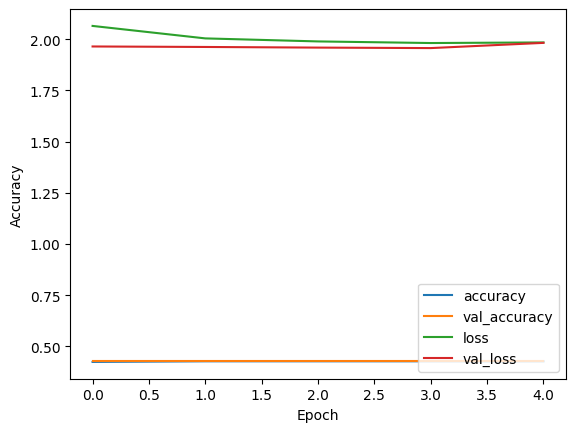

In [ ]:
plot_history(history_2)

###Tranfer Learning : Use pre-trained models to build models

#### DenseNet121 model

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
# Define input shape of the images
image_shape = (224, 224, 3)

Load pre-trained DenseNet model

In [ ]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=image_shape)

Add custom classification layers on top of the pre-trained model

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(15, activation='sigmoid')(x)

# Define the final model
model_3 = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze the pre-trained layers of the model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model 
model_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy', 'mae'])

In [ ]:
model_3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Train the model 
history_3 = model_3.fit(train_data,epochs=5,validation_data=test_data,callbacks=[stop_early])

Epoch 1/5
1593/1593 [==============================] - 650s 408ms/step - loss: 0.1781 - binary_accuracy: 0.9412 - mae: 0.0964 - val_loss: 0.1781 - val_binary_accuracy: 0.9437 - val_mae: 0.0991
Epoch 2/5
1593/1593 [==============================] - 643s 404ms/step - loss: 0.1772 - binary_accuracy: 0.9415 - mae: 0.0960 - val_loss: 0.1775 - val_binary_accuracy: 0.9444 - val_mae: 0.0881
Epoch 3/5
1593/1593 [==============================] - 646s 405ms/step - loss: 0.1764 - binary_accuracy: 0.9417 - mae: 0.0956 - val_loss: 0.1781 - val_binary_accuracy: 0.9428 - val_mae: 0.1002
Epoch 4/5
1593/1593 [==============================] - 650s 408ms/step - loss: 0.1761 - binary_accuracy: 0.9417 - mae: 0.0955 - val_loss: 0.1792 - val_binary_accuracy: 0.9436 - val_mae: 0.0937
Epoch 5/5
1593/1593 [==============================] - 637s 400ms/step - loss: 0.1757 - binary_accuracy: 0.9418 - mae: 0.0954 - val_loss: 0.1758 - val_binary_accuracy: 0.9443 - val_mae: 0.0946


Show the ROC curve for each metric and evaluate the model

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
pred_Y = model_3.predict(test_data, batch_size = 32, verbose = True)

177/177 [==============================] - 18s 87ms/step


In [ ]:
class_names = sorted(os.listdir(data_dir))

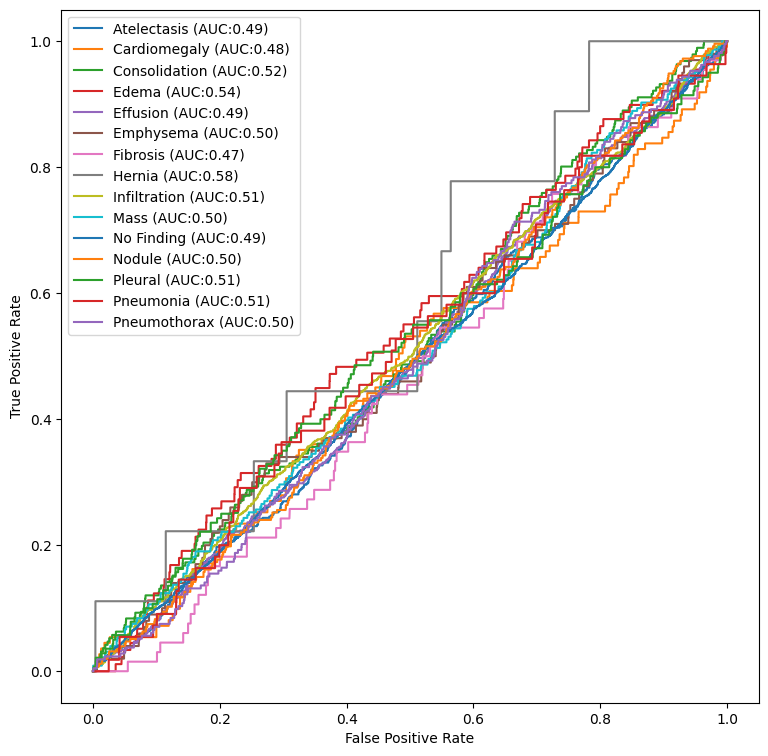

In [ ]:
fig, c_ax = plt.subplots(1, 1, figsize=(9, 9))

fpr = dict()
tpr = dict()
roc_auc = dict()

for idx, c_label in enumerate(class_names):
    fpr[idx], tpr[idx], _ = roc_curve(test_data.classes == idx, pred_Y[:, idx])
    roc_auc[idx] = auc(fpr[idx], tpr[idx])
    c_ax.plot(fpr[idx], tpr[idx], label='%s (AUC:%0.2f)' % (c_label, roc_auc[idx]))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

#### VGG19 model

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=image_shape)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(15, activation='softmax')(x)

# Define the final model
model_4 = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze the pre-trained layers of the model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model 
model_4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy', 'mae'])

In [ ]:
model_4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Train the model 
history_4 = model_4.fit(train_data,epochs=5,validation_data=test_data,callbacks=[stop_early])

Epoch 1/5
1593/1593 [==============================] - 680s 423ms/step - loss: 1.9668 - accuracy: 0.4258 - mae: 0.1016 - val_loss: 1.9146 - val_accuracy: 0.4301 - val_mae: 0.1038
Epoch 2/5
1593/1593 [==============================] - 664s 417ms/step - loss: 1.9285 - accuracy: 0.4276 - mae: 0.1002 - val_loss: 1.8719 - val_accuracy: 0.4317 - val_mae: 0.0997
Epoch 3/5
1593/1593 [==============================] - 666s 418ms/step - loss: 1.9165 - accuracy: 0.4278 - mae: 0.0996 - val_loss: 1.8627 - val_accuracy: 0.4300 - val_mae: 0.0975
Epoch 4/5
1593/1593 [==============================] - 661s 415ms/step - loss: 1.9072 - accuracy: 0.4286 - mae: 0.0993 - val_loss: 1.8522 - val_accuracy: 0.4316 - val_mae: 0.0951
Epoch 5/5
1593/1593 [==============================] - 669s 420ms/step - loss: 1.9024 - accuracy: 0.4310 - mae: 0.0990 - val_loss: 1.8704 - val_accuracy: 0.4372 - val_mae: 0.0930


In [ ]:
def plot_history(hist):
  plt.plot(hist.history['accuracy'], label='accuracy')
  plt.plot(hist.history['val_accuracy'], label='val_accuracy')
  plt.plot(hist.history['loss'], label='loss')
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  
  loss, acc, mae = model_4.evaluate(test_data)
  print("Accuracy", acc)

177/177 [==============================] - 26s 143ms/step - loss: 1.8704 - accuracy: 0.4372 - mae: 0.0930
Accuracy 0.43721258640289307


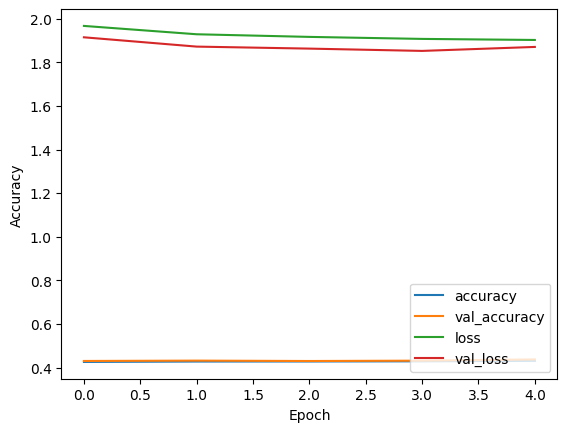

In [ ]:
plot_history(history_4)

#### InceptionV3 model

In [ ]:
incep3="https://tfhub.dev/google/imagenet/inception_v1/classification/5"

feature_extractor_model = incep3

In [ ]:
import tensorflow_hub as hub
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=True)

In [ ]:
from keras.models import Sequential

In [ ]:
model_5 = tf.keras.Sequential([
 
  feature_extractor_layer,
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation="relu"),
 
  keras.layers.Dense(15, activation="softmax")
])

In [ ]:
model_5.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_5.fit(train_data,epochs=5,validation_data=test_data)

Epoch 1/5
1593/1593 [==============================] - 789s 482ms/step - loss: 2.1500 - accuracy: 0.4254 - val_loss: 2.0867 - val_accuracy: 0.4468
Epoch 2/5
1593/1593 [==============================] - 764s 479ms/step - loss: 2.0477 - accuracy: 0.4436 - val_loss: 2.0601 - val_accuracy: 0.4512
Epoch 3/5
1593/1593 [==============================] - 769s 483ms/step - loss: 2.0094 - accuracy: 0.4516 - val_loss: 2.0694 - val_accuracy: 0.4473
Epoch 4/5
1593/1593 [==============================] - 742s 466ms/step - loss: 1.9841 - accuracy: 0.4555 - val_loss: 2.0473 - val_accuracy: 0.4455
Epoch 5/5
1593/1593 [==============================] - 728s 457ms/step - loss: 1.9633 - accuracy: 0.4601 - val_loss: 2.0376 - val_accuracy: 0.4505


In [ ]:
def plot_history(hist):
  plt.plot(hist.history['accuracy'], label='accuracy')
  plt.plot(hist.history['val_accuracy'], label='val_accuracy')
  plt.plot(hist.history['loss'], label='loss')
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

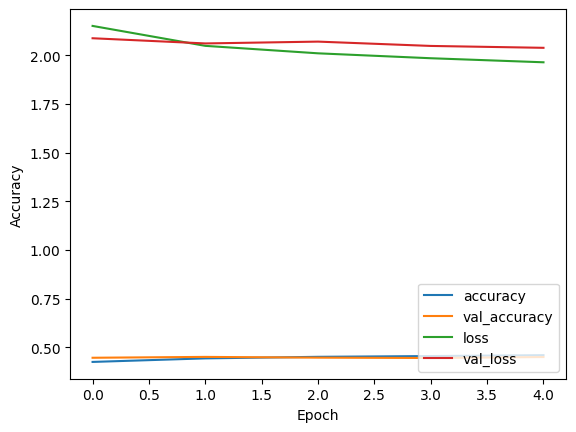

In [ ]:
plot_history(history)

In [ ]:
loss, accu = model_5.evaluate(test_data)

177/177 [==============================] - 13s 75ms/step - loss: 2.0376 - accuracy: 0.4505


#### VGG16 model

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=image_shape)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(15, activation='softmax')(x)

# Define the final model
model_6 = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
len(base_model.layers)

19

In [ ]:
# partial unfreeze the pre-trained layers of the model
for idx,layer in enumerate(base_model.layers):
  if idx>12: # the last ten layers will be trainable
    layer.trainable=True
  else:
    layer.trainable = False # to ten layers is frozen

In [ ]:
# Compile the model 
model_6.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy', 'mae'])

In [ ]:
model_6.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# Train the model 
history_6 = model_6.fit(train_data,epochs=5,validation_data=test_data,callbacks=[stop_early])

Epoch 1/5
1593/1593 [==============================] - 817s 501ms/step - loss: 1.9533 - accuracy: 0.4234 - mae: 0.1001 - val_loss: 1.9530 - val_accuracy: 0.4213 - val_mae: 0.1069
Epoch 2/5
1593/1593 [==============================] - 812s 510ms/step - loss: 1.8890 - accuracy: 0.4273 - mae: 0.0972 - val_loss: 1.8547 - val_accuracy: 0.4273 - val_mae: 0.0935
Epoch 3/5
1593/1593 [==============================] - 811s 509ms/step - loss: 1.8676 - accuracy: 0.4302 - mae: 0.0965 - val_loss: 1.8211 - val_accuracy: 0.4438 - val_mae: 0.0935
Epoch 4/5
1593/1593 [==============================] - 791s 497ms/step - loss: 1.8583 - accuracy: 0.4317 - mae: 0.0960 - val_loss: 1.8095 - val_accuracy: 0.4305 - val_mae: 0.0941
Epoch 5/5
1593/1593 [==============================] - 780s 490ms/step - loss: 1.8472 - accuracy: 0.4347 - mae: 0.0956 - val_loss: 1.8274 - val_accuracy: 0.4379 - val_mae: 0.0929


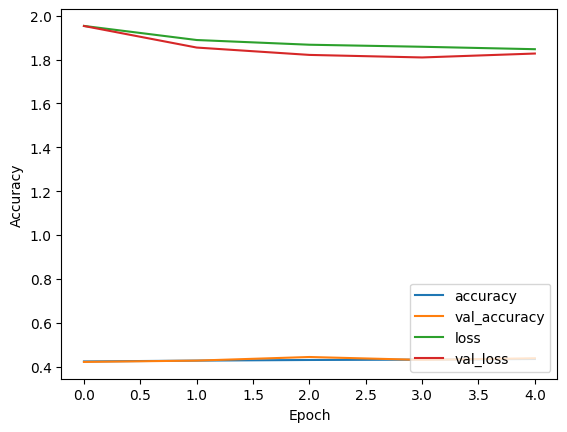

In [ ]:
plot_history(history_6)

## HeatMap from CNN


[theory link](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*NIRC4_NgHKps3Dq90ZSXeg.png)

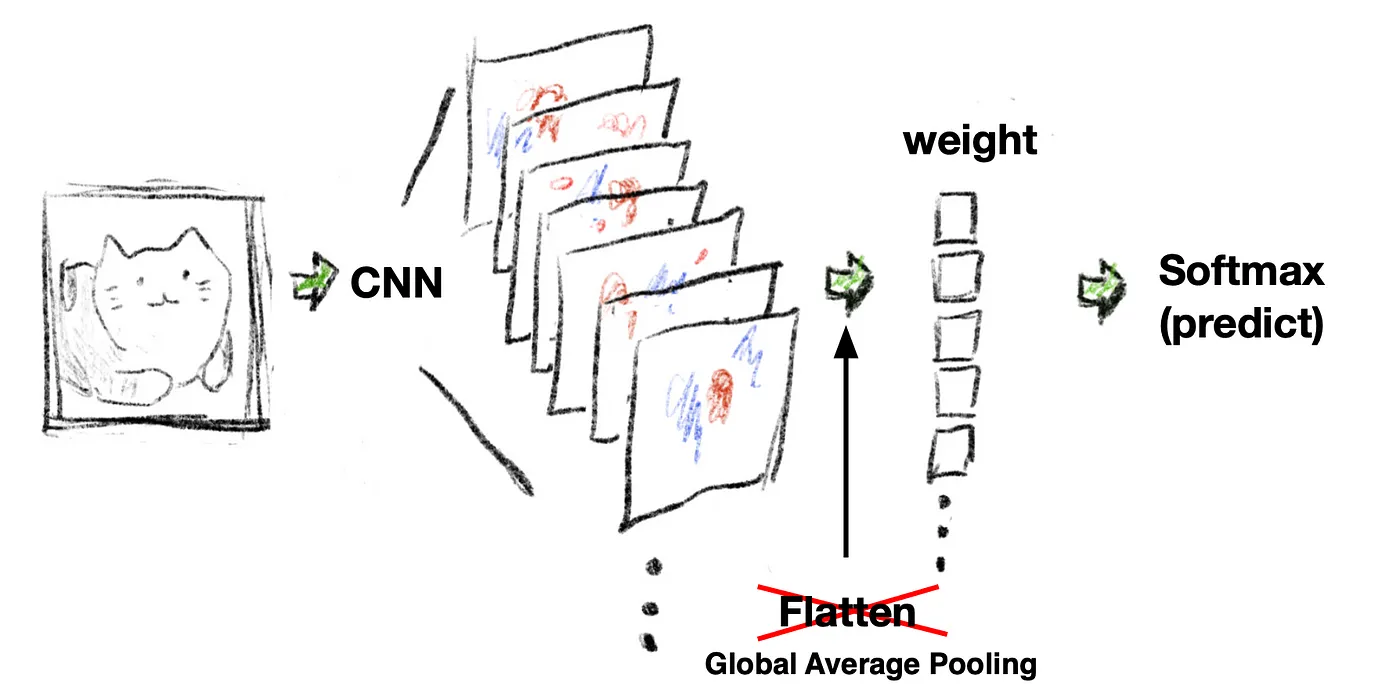

In [ ]:
# image_folder =  str(paths) +"/"+ folder
#     images = os.listdir(image_folder)

In [ ]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions
imag = []
# model_builder.summary()
last_conv_layer_name = "block14_sepconv2_act"

# Reading 2 Covid & 2 Normal Images for Grad-Cam Analysis
# data_dir1  /content/Nih All d/

img_path = ["/content/Nih All d/Edema/Atelectasis.Cardiomegaly.Consolidation.Edema.00012364_006.png",
            "/content/Nih All d/Cardiomegaly/Atelectasis.Cardiomegaly.00003973_003.png",
            "/content/Nih All d/Effusion/Atelectasis.Cardiomegaly.Consolidation.Effusion.00018387_030.png",
            "/content/Nih All d/No Finding/No Finding.00000013_014.png"
            ]
            

####Grad - CAM Algorithm

In [ ]:
# To Get Image into numpy array

def get_img_array(img_path, size):
    img = keras.preprocessing.image.load_img(img_path, target_size = size) 
    array = keras.preprocessing.image.img_to_array(img) 
    array = np.expand_dims(array, axis = 0)
    return array

# Top create heatmaps for the samples

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index = None):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    # grad_model.summary()

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
# Storing Heatmap values into list

covid_noncovid_heatmap = []

for i in img_path:
    img_array = preprocess_input(get_img_array(i, size = img_size))
    model = model_builder(weights = "imagenet")
    model.layers[-1].activation = None
    preds = model.predict(img_array)
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    covid_noncovid_heatmap.append(heatmap)

1/1 [==============================] - 1s 684ms/step


In [ ]:
import matplotlib.cm as cm
def save_and_display_gradcam(img_path, heatmap, cam_path = "cam.jpg", alpha = 0.4):
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)

    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    superimposed_img.save(cam_path)
    
    imag.append(cv2.imread(img_path))
    imag.append(cv2.imread("./cam.jpg"))


for i in range(len(img_path)):
    save_and_display_gradcam(img_path[i], covid_noncovid_heatmap[i])

<ipython-input-20-c3f4b8ae15e9>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


In [ ]:
def plot_multiple_img(img_matrix_list, title_list, ncols, main_title = ""):
    
    fig, myaxes = plt.subplots(figsize = (15, 8), nrows = 2, ncols = ncols, squeeze = False)
    fig.suptitle(main_title, fontsize = 18)
    fig.subplots_adjust(wspace = 0.3)
    fig.subplots_adjust(hspace = 0.3)
    
    for i, (img, title) in enumerate(zip(img_matrix_list, title_list)):
        myaxes[i // ncols][i % ncols].imshow(img)
        myaxes[i // ncols][i % ncols].set_title(title, fontsize = 15)
        
    plt.show()

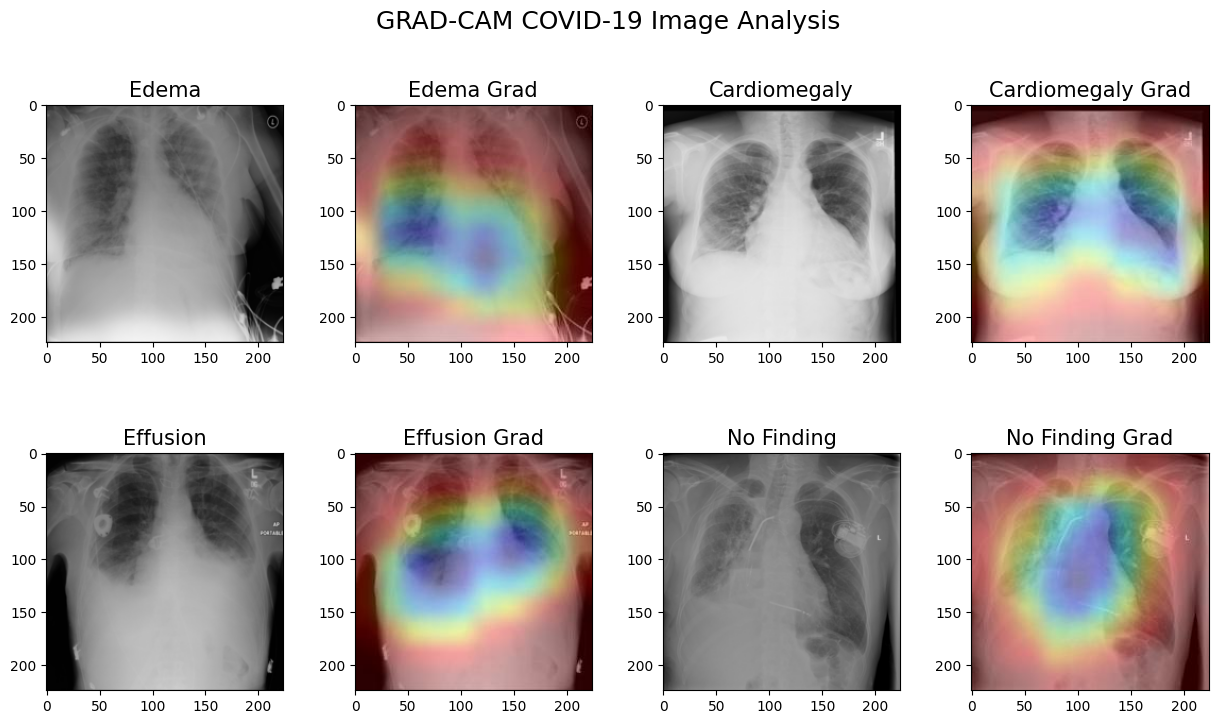

In [ ]:
titles_list = ["Edema",'Edema Grad','Cardiomegaly','Cardiomegaly Grad','Effusion','Effusion Grad','No Finding','No Finding Grad']

plot_multiple_img(imag, titles_list, ncols = 4, main_title = "GRAD-CAM COVID-19 Image Analysis")